In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("RDS_data.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'RDS_data.csv'

In [ ]:
raw_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,54221,54222,54223,54224,54225,54226,54227,54228,54229,54230
id,38676116,38656203,38656154,38656128,38656121,38656111,38656110,38656067,38656063,38656052,...,395632,90395,88637,88046,115606,76597,142608,117045,88854,72323
member_id,41461848,41440010,41439961,41439934,41439927,41439917,41439916,41439872,41439868,41439857,...,91027,90390,88629,88023,87310,76583,74724,70978,70699,70694
loan_amount,8000,13200,16000,15000,15000,2525,6675,26500,10000,10000,...,5500,5000,6000,4400,12800,5000,5000,3500,5000,5000
funded_amount,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26500.0,10000.0,NaN,...,5500.0,5000.0,6000.0,4400.0,12800.0,5000.0,5000.0,3500.0,5000.0,5000.0
funded_amount_inv,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26200.0,10000.0,10000.0,...,5450.0,1325.0,650.0,1400.0,1000.0,1775.0,2350.0,2225.0,225.0,350.0
term,36 months,36 months,36 months,36 months,36 months,36 months,NaN,NaN,60 months,36 months,...,36 months,36 months,36 months,36 months,NaN,36 months,36 months,36 months,36 months,36 months
int_rate,7.49,6.99,7.49,14.31,6.03,11.44,21.99,19.99,12.99,8.19,...,13.16,8.07,10.59,9.64,15.01,9.01,10.59,7.43,7.43,11.54
instalment,248.82,407.52,497.63,514.93,456.54,83.2,254.89,701.95,227.48,314.25,...,185.74,156.84,195.28,141.25,443.81,159.03,162.73,108.77,155.38,164.98
grade,A,A,A,C,A,B,E,E,C,A,...,C,A,C,B,F,B,C,A,A,C
sub_grade,A4,A3,A4,C4,A1,B4,E5,E3,C2,A5,...,C3,A4,C2,B4,F1,B2,C2,A2,A2,C5


In [ ]:
raw_data['term'].unique()

array(['36 months', nan, '60 months'], dtype=object)

In [ ]:
raw_data.dtypes

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

<AxesSubplot:xlabel='employment_length', ylabel='Count'>

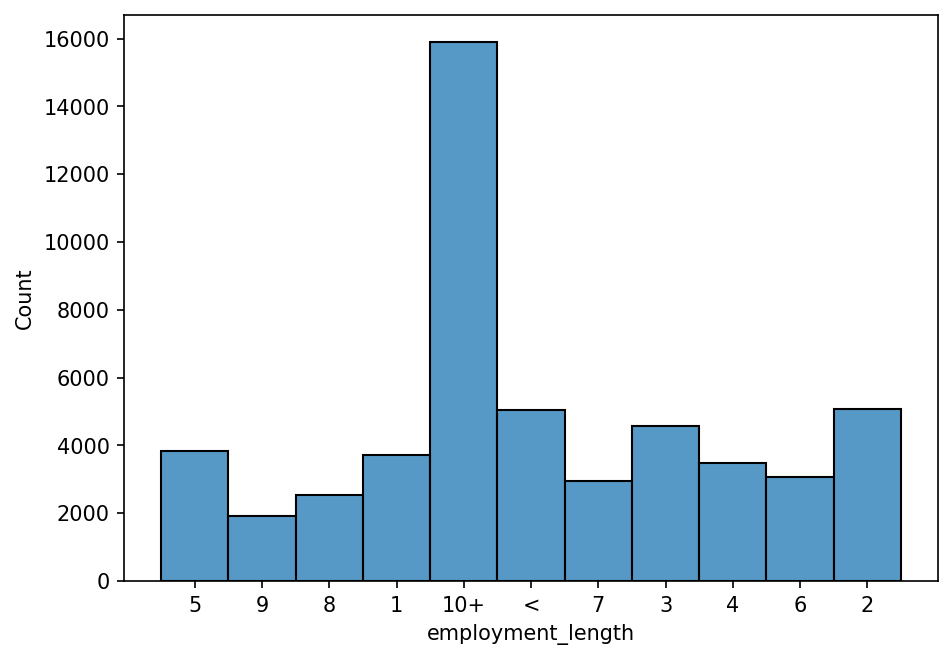

In [ ]:
replacements = {"10+":"11", "<1": "0"}
employment_lengths = raw_data['employment_length']#.str.split().str[0].astype(int)

employment_lengths = employment_lengths.replace(replacements).str.split().str[0].str.strip()

plt.figure(figsize=(7,5),dpi=150)
sns.histplot(employment_lengths)

<AxesSubplot:ylabel='Count'>

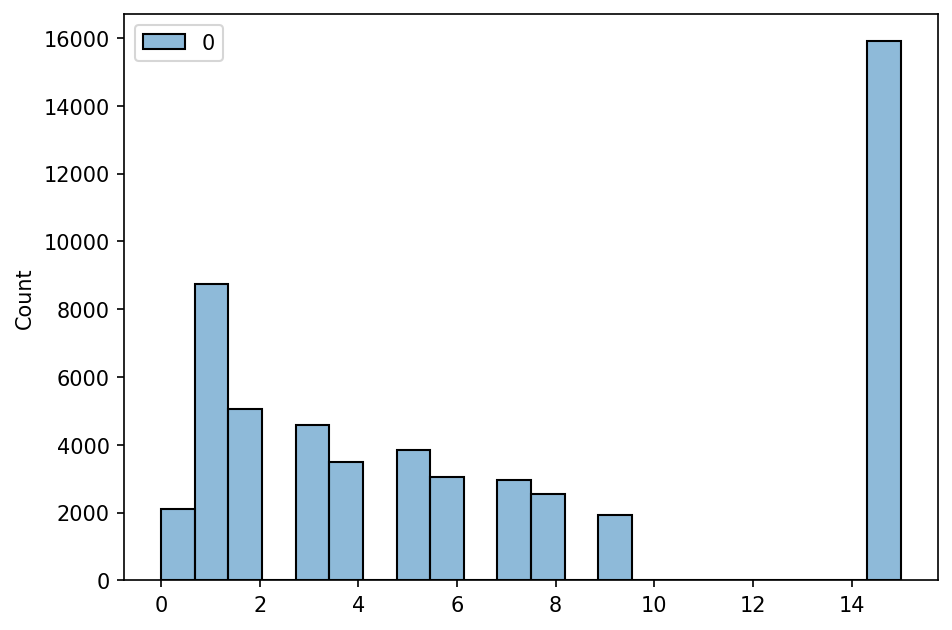

In [ ]:
employment_lengths = raw_data['employment_length']#.str.split().str[0].astype(int)

employment_lengths = employment_lengths.replace({"<1 year": "0", "10+ years": "15"})

# Extract numeric values and convert to integers
employment_lengths = employment_lengths.str.extract('(\d+)').astype(float).fillna(0).astype(int)

plt.figure(figsize=(7,5),dpi=150)
sns.histplot(employment_lengths)

In [ ]:
employment_lengths[0].unique()

array([ 5,  9,  8,  1, 15,  0,  7,  3,  4,  6,  2])

In [ ]:
dt_cols = ["issue_date","earliest_credit_line","last_payment_date","next_payment_date","last_credit_pull_date",]
raw_data[dt_cols]

,issue_date,earliest_credit_line,last_payment_date,next_payment_date,last_credit_pull_date
0,Jan-2021,Oct-1987,Jan-2022,Feb-2022,Jan-2022
1,Jan-2021,Sep-2001,Jan-2022,Feb-2022,Jan-2022
2,Jan-2021,Sep-1998,Oct-2021,NaN,Oct-2021
3,Jan-2021,Jun-2008,Jun-2021,NaN,Jun-2021
4,Jan-2021,Apr-2002,Jan-2022,Feb-2022,Jan-2022
...,...,...,...,...,...
54226,Jul-2013,Apr-2003,Jul-2016,NaN,Jul-2016
54227,Oct-2013,Jan-1999,Oct-2016,NaN,Sep-2016
54228,Aug-2013,Feb-1984,Sep-2016,Sep-2016,May-2013
54229,Aug-2013,Mar-1995,Mar-2014,NaN,May-2013


In [ ]:
pd.to_datetime(raw_data[dt_cols], format='%b-%Y', errors='coerce')


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing